In [16]:
# ============================== loading libraries ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
# from sklearn import cross_validation
from sklearn.model_selection import cross_validate
# =============================================================================================

In [17]:
# Part I
# ============================== data preprocessing ===========================================
# define column names
names = ['x', 'y', 'class']

# loading training data
df = pd.read_csv('./demo_data/3.concertriccir2.csv', header=None, names=names)
df["class"]=df["class"].astype("int64")
print(df.head())

# create design matrix X and target vector y
X = np.array(df.iloc[:, 0:2]) # end index is exclusive
y = np.array(df['class']) # showing you two ways of indexing a pandas df
print(X)
print(y)

          x         y  class
0  0.700335 -0.247068      0
1 -3.950019  2.740080      1
2  0.150222 -2.157638      1
3 -1.672050 -0.941519      1
4  2.560483 -1.846577      1
[[ 7.00334571e-01 -2.47067578e-01]
 [-3.95001869e+00  2.74007953e+00]
 [ 1.50221617e-01 -2.15763780e+00]
 [-1.67205033e+00 -9.41519069e-01]
 [ 2.56048303e+00 -1.84657672e+00]
 [-1.72497907e+00  3.46393036e+00]
 [ 1.89572778e-01  1.69996229e+00]
 [-3.34372344e-01  1.02928372e+00]
 [ 3.09811727e+00 -2.68185934e+00]
 [-1.24066342e+00 -1.22723646e+00]
 [-3.78850955e-01  7.50035894e-01]
 [ 2.92145879e+00 -2.08053008e+00]
 [-2.67496068e-03 -1.97511955e+00]
 [ 7.48777043e-01  1.94738919e-01]
 [ 1.60339212e+00 -1.55548115e+00]
 [ 4.95746877e-01 -1.85584900e+00]
 [ 2.06773287e+00 -2.91347893e+00]
 [-1.02614929e+00 -1.22721023e+00]
 [-1.05664139e+00  2.39349225e+00]
 [-1.55651057e+00  1.61888380e+00]
 [-1.44516496e+00  1.12363261e+00]
 [ 8.59137508e-02  2.98575492e-01]
 [ 1.72281294e-01  1.59733146e+00]
 [ 3.51855148e-01 -4.

### Simple Cross Validation 

In [18]:
# split the data set into train and test
#X_1, X_test, y_1, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_train, y_train, test_size=0.2)

In [19]:
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)
    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)
    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)
    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))


CV accuracy for k = 1 is 87%

CV accuracy for k = 3 is 86%

CV accuracy for k = 5 is 85%

CV accuracy for k = 7 is 82%

CV accuracy for k = 9 is 81%

CV accuracy for k = 11 is 82%

CV accuracy for k = 13 is 85%

CV accuracy for k = 15 is 83%

CV accuracy for k = 17 is 83%

CV accuracy for k = 19 is 85%

CV accuracy for k = 21 is 85%

CV accuracy for k = 23 is 82%

CV accuracy for k = 25 is 81%

CV accuracy for k = 27 is 81%

CV accuracy for k = 29 is 80%


In [20]:
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))


****Test accuracy for k = 1 is 93%


### 10 fold cross validation 


The optimal number of neighbors is 1.


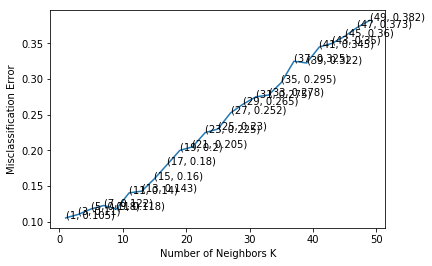

the misclassification error for each k value is :  [0.105 0.11  0.118 0.122 0.118 0.14  0.143 0.16  0.18  0.2   0.205 0.225
 0.23  0.252 0.265 0.275 0.278 0.295 0.325 0.322 0.345 0.35  0.36  0.373
 0.382]


In [21]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
# empty list that will hold cv scores
cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)
# plot misclassification error vs k 
plt.plot(neighbors, MSE)
for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
print("the misclassification error for each k value is : ", np.round(MSE,3))

In [29]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
# fitting the model
knn_optimal.fit(X_train, y_train)
# predict the response
pred = knn_optimal.predict(X_test)
# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 1 is 93.000000%
